# Домашнее задание №1
## Часть2: Классификация FashionMNIST
##### Автор: [Радослав Нейчев](https://www.linkedin.com/in/radoslav-neychev/), https://t.me/s/rads_ai

В данном задании вам предстоит решить достаточно простую задачу классификации изображений с помощью сверточных нейронных сетей.

In [32]:
# do not change the code in the block below
# __________start of block__________
import json
import os
import re

import numpy as np
import torch
import torchvision
from IPython.display import clear_output
from matplotlib import pyplot as plt
from torch import nn
from torch.nn import functional as F
from torchvision.datasets import FashionMNIST

# __________end of block__________

In [33]:
# do not change the code in the block below
# __________start of block__________
def get_predictions(model, eval_data, step=10):

    predicted_labels = []
    model.eval()
    with torch.no_grad():
        for idx in range(0, len(eval_data), step):
            y_predicted = model(eval_data[idx : idx + step].to(device))
            predicted_labels.append(y_predicted.argmax(dim=1).cpu())

    predicted_labels = torch.cat(predicted_labels)
    predicted_labels = ",".join([str(x.item()) for x in list(predicted_labels)])
    return predicted_labels


def get_accuracy(model, data_loader):
    predicted_labels = []
    real_labels = []
    model.eval()
    with torch.no_grad():
        for batch in data_loader:
            y_predicted = model(batch[0].to(device))
            predicted_labels.append(y_predicted.argmax(dim=1).cpu())
            real_labels.append(batch[1])

    predicted_labels = torch.cat(predicted_labels)
    real_labels = torch.cat(real_labels)
    accuracy_score = (predicted_labels == real_labels).type(torch.FloatTensor).mean()
    return accuracy_score


# __________end of block__________

Загрузите файл `hw_overfitting_data_dict.npy` (ссылка есть на странице с заданием), он понадобится для генерации посылок. Код ниже может его загрузить (но в случае возникновения ошибки скачайте и загрузите его вручную).


In [34]:
#!wget https://github.com/girafe-ai/ml-course/raw/24f_ysda/homeworks/hw_overfitting/hw_overfitting_data_dict -O hw_overfitting_data_dict.npy

In [35]:
!ls -lh hw_overfitting_data_dict.npy

-rw-rw-r-- 1 kaanr kaanr 6.0M Sep 17 07:29 hw_overfitting_data_dict.npy


In [36]:
# do not change the code in the block below
# __________start of block__________
assert os.path.exists(
    "hw_overfitting_data_dict.npy"
), "Please, download `hw_overfitting_data_dict.npy` and place it in the working directory"

# __________end of block__________

Вернемся к задаче распознавания простых изображений, рассмотренной ранее. Но теперь будем работать с набором данных [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist). В данном задании воспользуемся всем датасетом целиком.

__Ваша первая задача: реализовать весь пайплан обучения модели и добиться качества $\geq 88.5\%$ на тестовой выборке.__

Код для обучения модели в данном задании отсутствует. Присутствует лишь несколько тестов, которые помогут вам отладить свое решение. За примером можно обратиться к ноутбукам с предыдущих занятий.

In [37]:
CUDA_DEVICE_ID = 0  # change if needed

In [38]:
if torch.cuda.is_available():
    print(f"Available GPUs: {torch.cuda.device_count()}")
    device = torch.device(f"cuda:{CUDA_DEVICE_ID}")
    print("Current GPU: ", torch.cuda.get_device_name())
else:
    device = torch.device("cpu")

Available GPUs: 1
Current GPU:  NVIDIA GeForce RTX 4090 Laptop GPU


In [39]:
# do not change the code in the block below
# __________start of block__________
device = (
    torch.device(f"cuda:{CUDA_DEVICE_ID}") if torch.cuda.is_available() else torch.device("cpu")
)
# __________end of block__________

Text(0.5, 1.0, 'Image label: 0')

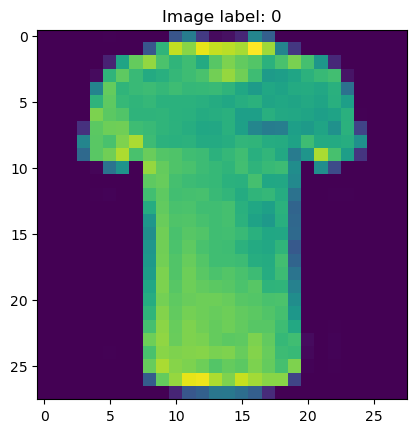

In [40]:
# do not change the code in the block below
# __________start of block__________

train_fmnist_data = FashionMNIST(
    ".", train=True, transform=torchvision.transforms.ToTensor(), download=True
)
test_fmnist_data = FashionMNIST(
    ".", train=False, transform=torchvision.transforms.ToTensor(), download=True
)


train_data_loader = torch.utils.data.DataLoader(
    train_fmnist_data, batch_size=32, shuffle=True, num_workers=2
)

test_data_loader = torch.utils.data.DataLoader(
    test_fmnist_data, batch_size=32, shuffle=False, num_workers=2
)

random_batch = next(iter(train_data_loader))
_image, _label = random_batch[0][0], random_batch[1][0]
plt.figure()
plt.imshow(_image.reshape(28, 28))
plt.title(f"Image label: {_label}")
# __________end of block__________

## Вопросы:
1. Что такое PIL images?
2. Что такое PyTorch Tensors?

Постройте модель ниже. Пожалуйста, не стройте переусложненную сеть, не стоит делать ее глубже четырех слоев (можно и меньше). Ваша основная задача – обучить модель и получить качество на отложенной (тестовой выборке) не менее 88.5% accuracy.

__Внимание, ваша модель должна быть представлена именно переменной `model_task_1`. На вход ей должен приходить тензор размерностью (1, 28, 28).__

In [41]:
# Creating model instance - Simple CNN (only 3 layers)
model_task_1 = nn.Sequential(
    # First conv layer
    nn.Conv2d(1, 16, 5, padding=2),  # (1,28,28) -> (16,28,28)
    nn.ReLU(),
    nn.MaxPool2d(2),                 # (16,28,28) -> (16,14,14)
    
    # Second conv layer  
    nn.Conv2d(16, 32, 5, padding=2), # (16,14,14) -> (32,14,14)
    nn.ReLU(),
    nn.MaxPool2d(2),                 # (32,14,14) -> (32,7,7)
    
    # Output layer
    nn.Flatten(),                    # (32,7,7) -> (1568)
    nn.Linear(32*7*7, 10)           # (1568) -> 10 classes
).to(device)

## Вопросы:
1. Распиши, что происходит в ячейке выше.
2. Что такое Convolution и что она в действительности делает?
3. Что такое ReLU и зачем мы его используем?
4. Как нейронка "учится" определять эти паттерны?
5. Почему сперва 16, потом 32?

## Ответы:
1. В этой ячейке мы создаем нашу модель. Она состоит из трех слоёв.
   Первый слой: это детектор простых паттернов: границы, линии, углы. На вход первого слоя поступает картинка 28х28 (1 канал).
                На выходе - 16 различных карт паттернов - они показывают где эти паттерны обнаружены на картинке.
   Второй слой: это детектор сложных паттернов - объединяет границы с первого слоя для нахождения рукавов, воротников, подошв.
                На выходе - 32 различные карты паттернов.
   Третий слой: Flatten - конвертирует все найденные карты в лист чисел.
                Linear - смотрит во все паттерны и определяет: "Это выглядет больше как класс (7) - sneaker!
2.Convolution - это 

Не забудьте перенести модель на выбранный `device`!

In [42]:
model_task_1.to(device)

Sequential(
  (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=1568, out_features=10, bias=True)
)

Локальные тесты для проверки вашей модели доступны ниже:

In [43]:
# do not change the code in the block below
# __________start of block__________
assert model_task_1 is not None, "Please, use `model_task_1` variable to store your model"

try:
    x = random_batch[0].to(device)
    y = random_batch[1].to(device)

    # compute outputs given inputs, both are variables
    y_predicted = model_task_1(x)
except Exception as e:
    print("Something is wrong with the model")
    raise e


assert y_predicted.shape[-1] == 10, "Model should predict 10 logits/probas"

print("Everything seems fine!")
# __________end of block__________

Everything seems fine!


Настройте параметры модели на обучающей выборке. Также рекомендуем поработать с `learning rate`.

In [44]:
learning_rate = 0.01

# Training setup
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_task_1.parameters(), lr=0.01)
num_epochs = 15

# Training loop
for epoch in range(num_epochs):
    model_task_1.train()
    
    for data, targets in train_data_loader:
        # Move to device
        data, targets = data.to(device), targets.to(device)
        
        # Forward pass
        outputs = model_task_1(data)
        loss = criterion(outputs, targets)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Simple progress check
    if (epoch + 1) % 5 == 0:
        test_acc = get_accuracy(model_task_1, test_data_loader)
        print(f"Epoch {epoch+1}: Test accuracy = {test_acc:.3f}")

print("Training finished!")

Epoch 5: Test accuracy = 0.865
Epoch 10: Test accuracy = 0.881
Epoch 15: Test accuracy = 0.895
Training finished!


Также, напоминаем, что в любой момент можно обратиться к замечательной [документации](https://pytorch.org/docs/stable/index.html) и [обучающим примерам](https://pytorch.org/tutorials/).  

Оценим качество классификации:

In [45]:
train_acc_task_1 = get_accuracy(model_task_1, train_data_loader)
print(f"Neural network accuracy on train set: {train_acc_task_1:3.5}")

Neural network accuracy on train set: 0.91062


In [46]:
test_acc_task_1 = get_accuracy(model_task_1, test_data_loader)
print(f"Neural network accuracy on test set: {test_acc_task_1:3.5}")

Neural network accuracy on test set: 0.8949


Проверка, что необходимые пороги пройдены:

In [47]:
assert test_acc_task_1 >= 0.885, "Test accuracy is below 0.885 threshold"
assert (
    train_acc_task_1 >= 0.905
), "Train accuracy is below 0.905 while test accuracy is fine. We recommend to check your model and data flow"

Обращаем внимане, код ниже предполагает, что ваша модель имеет содержится в переменной `model_task_1`, а файл `hw_fmnist_data_dict.npy` находится в той же директории, что и ноутбук (он доступен в репозитории).

In [48]:
# do not change the code in the block below
# __________start of block__________
assert os.path.exists(
    "hw_fmnist_data_dict.npy"
), "Please, download `hw_fmnist_data_dict.npy` and place it in the working directory"

loaded_data_dict = np.load("hw_fmnist_data_dict.npy", allow_pickle=True)

submission_dict = {
    "train_predictions_task_1": get_predictions(
        model_task_1, torch.FloatTensor(loaded_data_dict.item()["train"])
    ),
    "test_predictions_task_1": get_predictions(
        model_task_1, torch.FloatTensor(loaded_data_dict.item()["test"])
    ),
}

with open("submission_dict_fmnist_task_1.json", "w") as iofile:
    json.dump(submission_dict, iofile)
print("File saved to `submission_dict_fmnist_task_1.json`")
# __________end of block__________

File saved to `submission_dict_fmnist_task_1.json`


### zxzcv
 Сдача задания
Сдайте сгенерированный файл в соответствующую задачу в соревновании, а именно:
    
* `submission_dict_fmnist_task_1.json` в задачу Separation

На этом задание завершено. Поздравляем!